## OCR ESERCITAZIONE

Costruire un modello ibrido per il riconoscimento di caratteri (OCR).
1. Il modello deve comprendere almeno un layer convoluzionale in input e successivamente un layer ricorrente
2. Utilizza un layer Reshape tra la parte convoluzionale e lo strato ricorrente


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('./emnist_train.csv')

In [3]:
train_df.head()

,char,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,r,45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,a,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,n,43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,F,15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
label_dict = {0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [5]:
W, H=28,28
X = train_df.iloc[:,2:]

In [6]:
import numpy as np
def reshape_and_rotate(image):
    W = 28
    H = 28
    image = image.reshape(W, H)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image



In [7]:
sample_image = train_df.iloc[1,2:]
sample_label = train_df.iloc[1]['char']
sample_image.shape,sample_label

((784,), 'a')

In [8]:
X = np.apply_along_axis(reshape_and_rotate, 1, X.values.astype('float32'))
X = X / 255

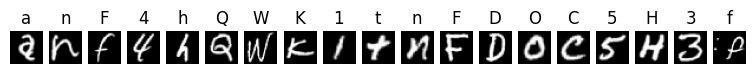

In [9]:
plt.figure(figsize=(10,10))
for i in range(1,20):
    plt.subplot(1,20,i)
    plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.gray)
    plt.title(train_df.iloc[i]['char'])
    plt.axis('off')